##  CREDIT CARD FRAUD DETECTION

### 1:  Import all standard library

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### 2: Load Dataset 

In [50]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [51]:
data.shape

(284807, 31)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [53]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [54]:
data['Class'].unique()

array([0, 1], dtype=int64)

- target variable is Class column so we can use classification algorithm
- In credit card fraud detection dataset has 284807 rows and 31 columns.

<AxesSubplot:>

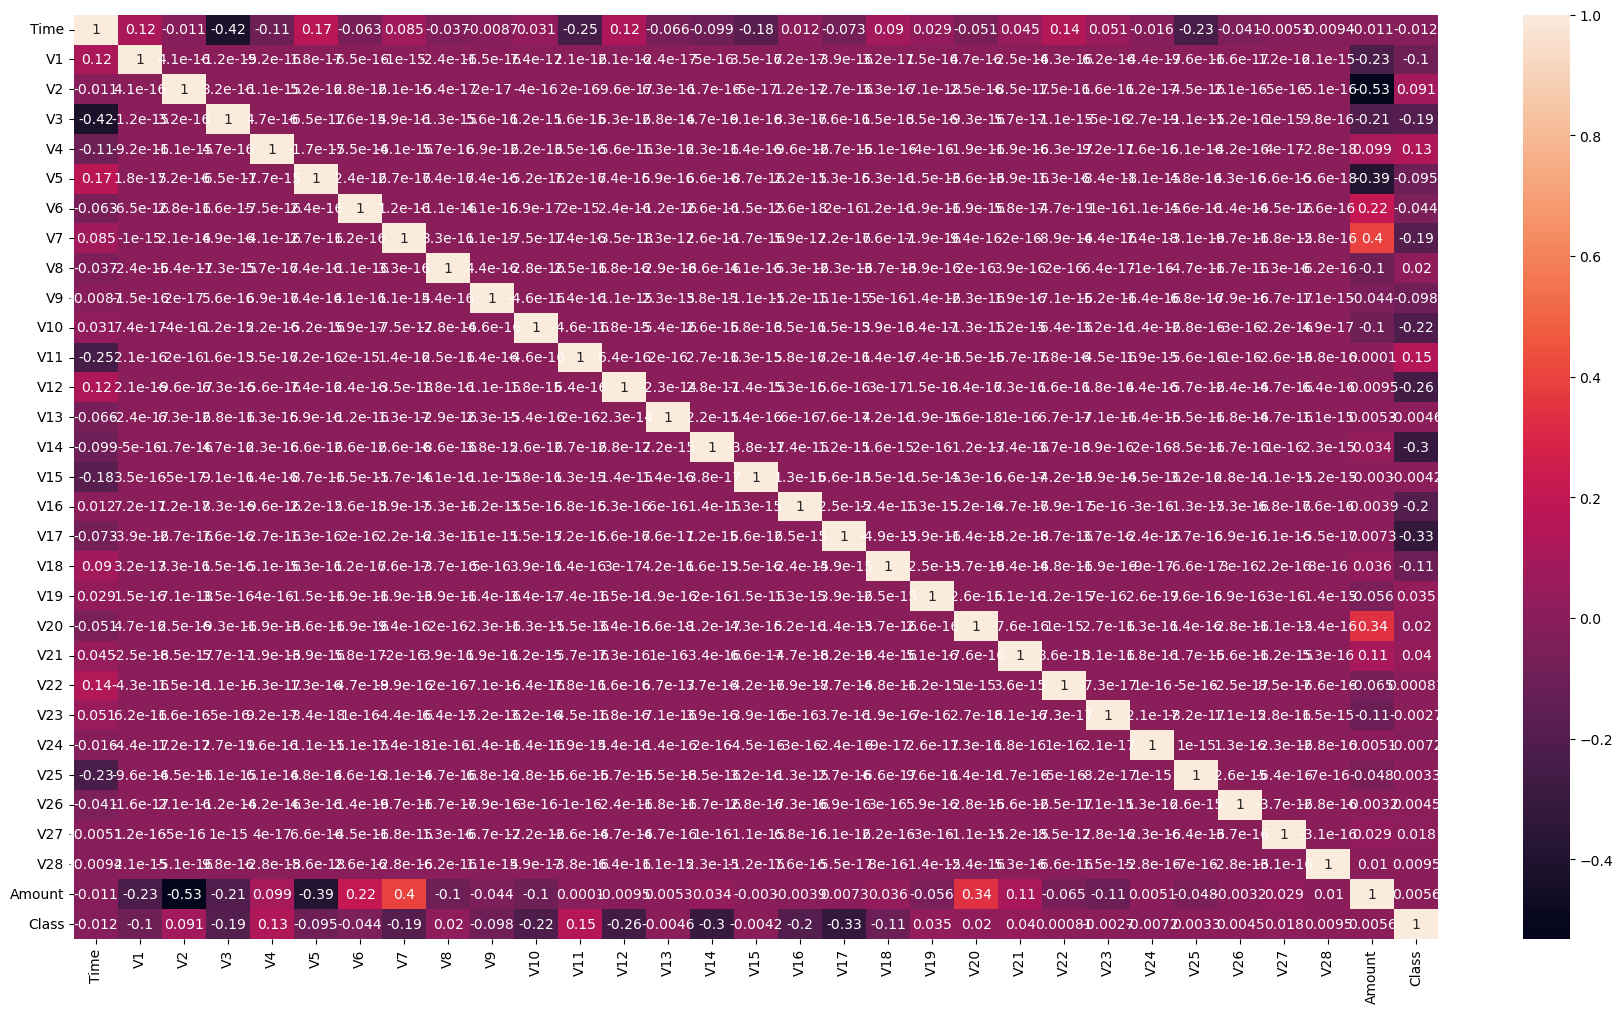

In [55]:
plt.figure(figsize=(22,12))
sns.heatmap(data.corr(),annot=True)

### 3: Separate X and Y

In [56]:
x = data.drop('Class',axis=1)
y= data['Class']

### 4: Split the dataset into train and test set

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

### 5: Apply Random Forest Classifier algorithm

In [58]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc

RandomForestClassifier()

In [59]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

### 6: Prediction

In [60]:
y_pred = rfc.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### 7: Evaluations

In [61]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, f1_score, precision_score, average_precision_score,  recall_score,  precision_recall_curve

In [62]:
def print_scores(y_test, y_pred):
    print(f'Accuracy  :{accuracy_score(y_test, y_pred):.2f}' )
    print(f'Balanced  :{balanced_accuracy_score(y_test, y_pred):.2f}' )
    print(f'F1        :{f1_score(y_test, y_pred):.2f}' )
    print(f'Precision :{precision_score(y_test, y_pred):.2f}' )
    print(f'Recall    :{recall_score(y_test, y_pred):.2f}' )
print_scores(y_test, y_pred)

Accuracy  :1.00
Balanced  :0.90
F1        :0.86
Precision :0.93
Recall    :0.79


### Conclude : With 31 columns in the data the accuracy achieved is 100%

##### Apply Forward Feature Selection Method and check accuracy.

In [63]:
## Applying LogReg of only 10 features of the data
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr

LogisticRegression()

In [64]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs = SFS(lr,k_features=10, forward=True, scoring='accuracy')
sfs

SequentialFeatureSelector(estimator=LogisticRegression(), k_features=10,
                          scoring='accuracy')

In [65]:
sfs1 = sfs.fit(x_train, y_train)
sfs1

SequentialFeatureSelector(estimator=LogisticRegression(), k_features=(10, 10),
                          scoring='accuracy')

- Getting the names of those 10 most important features that were selected

In [66]:
col_index = sfs1.k_feature_idx_
col_index = list(col_index)
col_index

[0, 1, 10, 12, 13, 14, 15, 19, 20, 26]

In [67]:
x_train = pd.DataFrame(x_train, columns = data.drop('Class', axis = 1).columns)
x_train.columns[col_index]

Index(['Time', 'V1', 'V10', 'V12', 'V13', 'V14', 'V15', 'V19', 'V20', 'V26'], dtype='object')

In [68]:
x_train = x_train.iloc[:, col_index]
x_train

,Time,V1,V10,V12,V13,V14,V15,V19,V20,V26
68806,53150.0,-1.115047,-0.816909,0.108177,-0.859610,-0.071934,0.906656,1.956778,-0.644896,-0.430853
40018,40060.0,1.228473,-0.014495,0.833158,0.469162,0.187845,0.598188,0.500875,0.032481,0.810356
250360,154865.0,1.926148,0.007083,0.317771,-1.035108,-0.098650,-1.079728,0.145642,-0.355216,-1.099295
234820,148130.0,2.046232,-0.478188,0.036516,-0.096162,-0.705034,0.955017,-0.504199,-0.216247,-0.098151
10001,15014.0,-0.837077,0.889521,-2.533696,0.780430,1.352159,-1.190343,1.371433,-0.134542,-0.074078
...,...,...,...,...,...,...,...,...,...,...
211543,138459.0,-1.321976,-0.446486,-0.625697,-0.932355,1.105463,0.341994,1.330776,-0.436962,0.316379
86293,61167.0,-0.627810,-0.853181,0.899184,1.394628,-0.461663,2.224552,-0.905200,0.088281,0.296733
122579,76616.0,1.512602,1.611424,-0.557701,0.158524,0.125956,-0.242395,0.631084,-0.279028,-0.495367
152315,97253.0,1.798863,0.470972,-3.441205,-0.092307,1.359234,-0.674104,0.495321,0.146098,-0.295152


In [69]:
lr.fit(x_train, y_train)

LogisticRegression()

In [70]:
x_test = x_test.iloc[:, col_index]
x_test

,Time,V1,V10,V12,V13,V14,V15,V19,V20,V26
183484,125821.0,-0.323334,-1.644401,0.202647,1.145965,-1.802360,-0.247178,0.847262,0.186409,0.008297
255448,157235.0,-0.349718,-1.192404,-0.620458,-0.806471,-0.770837,-0.108158,-0.148099,-0.096502,0.134350
244749,152471.0,-1.614711,-0.219013,-0.736771,-1.516835,0.348343,0.041437,-1.578951,0.419835,-1.041114
63919,50927.0,-2.477184,0.133040,0.435125,-0.336022,0.278965,1.812232,0.106228,-0.987790,-0.177847
11475,19899.0,1.338831,0.113386,-3.282511,0.409266,1.252202,-0.868774,0.263854,-0.126871,-0.268706
...,...,...,...,...,...,...,...,...,...,...
236778,148949.0,-1.227033,-1.639968,-0.086285,-0.271235,0.247726,-0.462397,-0.739693,-0.097164,0.749546
127073,78200.0,1.250596,-0.090898,0.052143,-0.068271,0.349700,1.259516,-0.276357,-0.130836,0.234803
208502,137149.0,1.125402,0.973563,-0.130742,-0.894290,1.193156,-0.887040,-0.434610,0.484541,0.961966
263323,160893.0,2.064857,-0.164642,0.811897,-0.076287,-0.453668,-0.852768,0.166812,-0.161876,0.662896


In [71]:
y_pred_fs = lr.predict(x_test)
y_pred_fs

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [72]:
accuracy_score(y_pred, y_test)

0.9995259997893332

- by using Feature Selection Method got approximate same accuracy i.e. 99.95%